In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Read in csv as df

df = pd.read_csv('water_potability.csv')

#Quick look at df
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
#Check for missing values 
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
#Drop all null values and check the shape
df = df.dropna()
df.shape

(2011, 10)

In [5]:
#Define our target
target = "Potability"

#Check to see if target is imbalanced

df[target].value_counts(normalize=True)

0    0.596718
1    0.403282
Name: Potability, dtype: float64

In [6]:
#Split data
X = df.drop(columns=target)
y = df[target]

#Train validation split 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#Baseline
print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.6026119402985075


In [7]:
#Building a Logistic Regression model with Standard Scaler 
model_LR = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)

)

#Fitting the model
model_LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [8]:
#Accuracy score for Logistic Regression model

print('Training Accuracy:',model_LR.score(X_train, y_train))
print('Validation Accuracy:', model_LR.score(X_val, y_val))

Training Accuracy: 0.6075870646766169
Validation Accuracy: 0.5707196029776674


In [9]:
#Tunning a logistic Regression model
#clf
clf1 = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)

)
#paramter grid
param_grid1 = {
    'logisticregression__C': np.logspace(-4, 4, 20),
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    
}

#Gridsearch

model_GSLR = GridSearchCV(
    clf1,
    param_grid = param_grid1,
    n_jobs=-1,
    cv= 5,
    verbose=1

)

model_GSLR.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'logisticregression__solver': ['liblinear', 'lbfgs']},
             verbose=1)

In [25]:
#Best Paramters
model_GSLR.best_params_

{'logisticregression__C': 0.0001, 'logisticregression__solver': 'liblinear'}

In [11]:
#Model using best tuned parameters
model_GSLRB = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 0.0001, solver='liblinear', random_state=42)

)
model_GSLRB.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.0001, random_state=42,
                                    solver='liblinear'))])

In [12]:
#Accuracy scores for tuned Logistic Regression model
print('Training Accuracy:',model_GSLRB.score(X_train, y_train))
print('Validation Accuracy:', model_GSLRB.score(X_val, y_val))

Training Accuracy: 0.6057213930348259
Validation Accuracy: 0.5732009925558312


In [13]:
#Building a XGBoost Model
model_XGB = make_pipeline(
   XGBClassifier(random_state=42, use_label_encoder=False)

)

model_XGB.fit(X_train, y_train)

[10:25:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=12, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [14]:
#Accuracy scores
print('Training Accuracy:',model_XGB.score(X_train, y_train))
print('Validation Accuracy:', model_XGB.score(X_val, y_val))

Training Accuracy: 1.0
Validation Accuracy: 0.6253101736972705


In [29]:
#Tunning a XGB Model
clf2 = make_pipeline(
   XGBClassifier(random_state=42, use_label_encoder=False)

)

#Parameter Grid 
param_grid2 = {
    'xgbclassifier__max_depth' : [2, 30, 2],
    'xgbclassifier__subsample' : [0.1, 1, 0.1],
    'xgbclassifier__colsample_bylevel' : [0.1, 1, 0.1],
    'xgbclassifier__colsample_bynode' : [0.1, 1, 0.1],
    'xgbclassifier__min_child_weight' : [5, 50, 5],
    'xgbclassifier__n_estimators' : [20, 200, 20],
    'xgbclassifier__learning_rate' : [.01, 1, .01]
    
    
}

#Gridsearch
model_GSXGB = GridSearchCV(
    clf2,
    param_grid = param_grid2,
    n_jobs=-1,
    cv= 5,
    verbose=1

)

model_GSXGB.fit(X_train, y_train)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[11:28:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      min_child_weight=None,
                

In [30]:
#Best Params
model_GSXGB.best_params_

{'xgbclassifier__colsample_bylevel': 1,
 'xgbclassifier__colsample_bynode': 1,
 'xgbclassifier__learning_rate': 0.01,
 'xgbclassifier__max_depth': 30,
 'xgbclassifier__min_child_weight': 5,
 'xgbclassifier__n_estimators': 200,
 'xgbclassifier__subsample': 1}

In [35]:
#XGB Model with best paramters
model_XGBest = make_pipeline(
   XGBClassifier(random_state=42, use_label_encoder=False,
                colsample_bylevel= 1, colsample_bynode=1,
                learning_rate=0.01, max_depth=30,
                min_child_weight=5, n_estimators=200,
                subsample=1)

)
#Fitting the best model to training data
model_XGBest.fit(X_train, y_train)


[12:01:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=30,
                               min_child_weight=5, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=12, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               use_label_encoder=False, validate_parameters=1,
                               verbosity=None))])

In [36]:
#Accuracy Scores
print('Training Accuracy:',model_XGBest.score(X_train, y_train))
print('Validation Accuracy:', model_XGBest.score(X_val, y_val))

Training Accuracy: 0.9067164179104478
Validation Accuracy: 0.652605459057072


<AxesSubplot:>

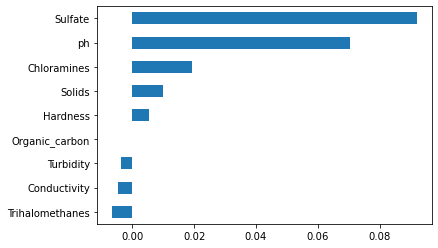

In [40]:
#Permutation importances 
perm_imp = permutation_importance(model_XGBest, X_val, y_val, random_state=42)

#Putting the importance mean and std into a dictionary
data_perm = {'imp_mean':perm_imp['importances_mean'],
             'imp_std':perm_imp['importances_std']}

#Putting the permutation importances sorted by imp mean into a dataframe to plot it
df_perm = pd.DataFrame(data_perm, index=X_val.columns).sort_values('imp_mean')

#Barplot of importances 
df_perm['imp_mean'].tail(10).plot(kind='barh')

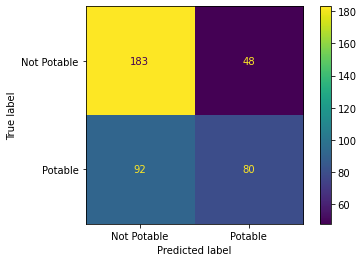

In [44]:
#Plotting a confusion Matrix
plot_confusion_matrix(
    model_XGBest,
    X_val, 
    y_val, 
    values_format='.0f',
    display_labels=['Not Potable', 'Potable']
);